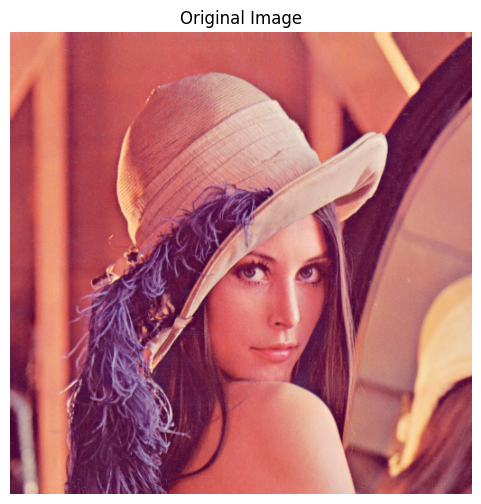

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image_path =r"/content/Lenna_(test_image).png"
image = Image.open(image_path)

plt.figure(figsize=(6,6))
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")
plt.show()

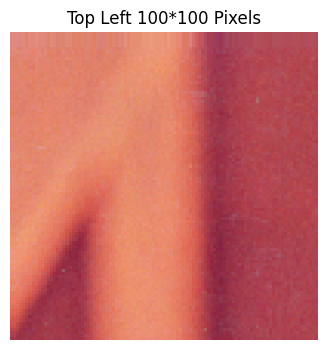

In [ ]:
numpy_image = np.array(image)
top_left = numpy_image[:100, :100]

plt.figure(figsize=(4,4))
plt.imshow(top_left)
plt.title("Top Left 100*100 Pixels")
plt.axis("off")
plt.show()

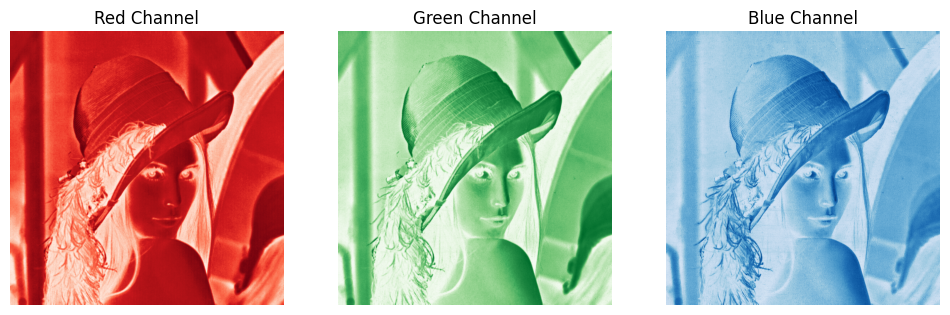

In [ ]:
r_channel = numpy_image[:,:,0]
g_channel = numpy_image[:,:,1]
b_channel = numpy_image[:,:,2]

fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].imshow(r_channel, cmap='Reds')
axs[0].set_title('Red Channel')
axs[0].axis('off')

axs[1].imshow(g_channel, cmap='Greens')
axs[1].set_title('Green Channel')
axs[1].axis('off')

axs[2].imshow(b_channel, cmap='Blues')
axs[2].set_title('Blue Channel')
axs[2].axis('off')

plt.show()

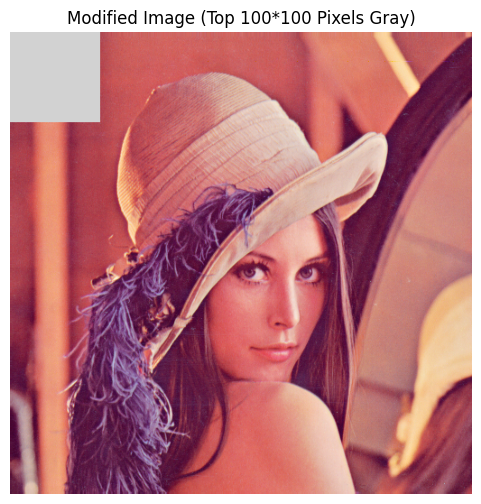

In [ ]:
modified_image = numpy_image.copy()
modified_image[:100, :100] = 210

plt.figure(figsize=(6,6))
plt.imshow(modified_image)
plt.title("Modified Image (Top 100*100 Pixels Gray)")
plt.axis("off")
plt.show()

Exercise2

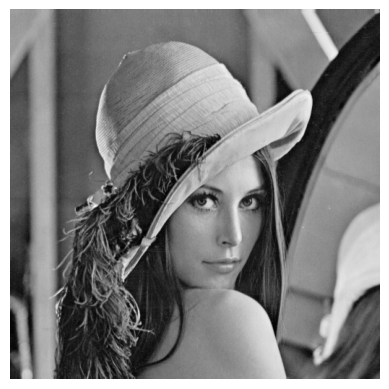

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

image_path = r"/content/Lenna_(test_image).png"
img = Image.open(image_path).convert('L')

plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

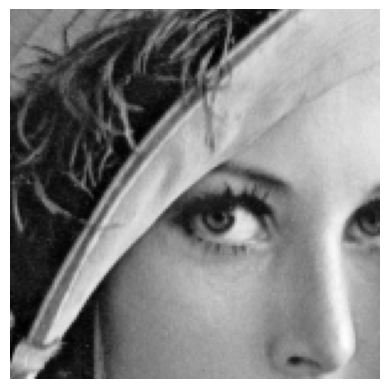

In [ ]:
import numpy as np

img_array = np.array(img)

height, width =img_array.shape
center_x, center_y = width // 2, height // 2

section = img_array[center_y - 75:center_y + 75, center_x - 75:center_x + 75]

plt.imshow(section, cmap='gray')
plt.axis('off')
plt.show()

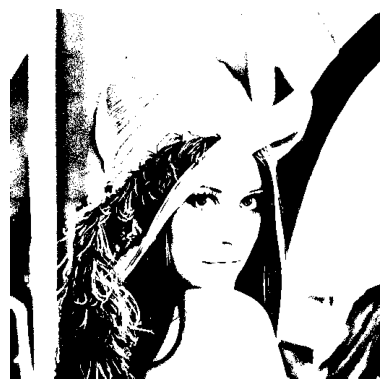

In [ ]:
thresholded_img = np.where(img_array <100,0,255)

plt.imshow(thresholded_img, cmap='gray')
plt.axis('off')
plt.show()

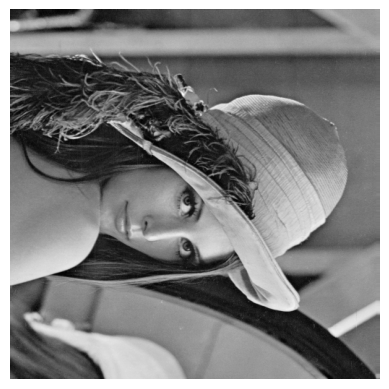

In [ ]:
rotated_img = img.rotate(-90, expand=True)

plt.imshow(rotated_img, cmap='gray')
plt.axis('off')
plt.show()

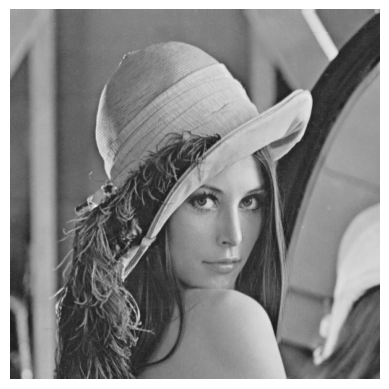

In [ ]:
rgb_img = img.convert('RGB')

plt.imshow(rgb_img)
plt.axis('off')
plt.show()

In [ ]:
Exercise3

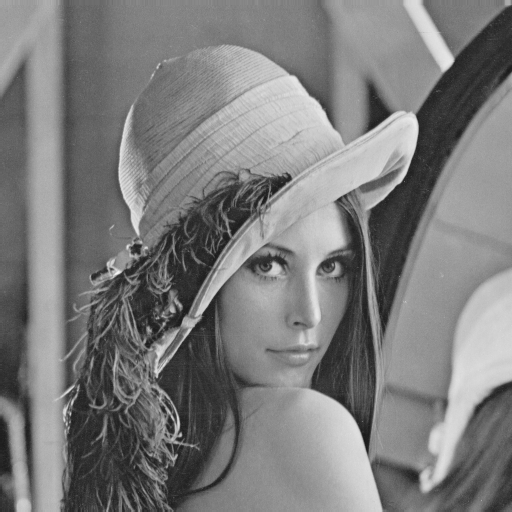

(512, 512)


In [ ]:
img = img.convert('L')
img_array = np.array(img)

display(img)
print(img_array.shape)

In [ ]:
mean = np.mean(img_array, axis=0)
centered_img =img_array -mean
centered_img.shape

(512, 512)

In [ ]:
covariance_matrix  = np.cov(centered_img, rowvar=False)
print(covariance_matrix)

[[1547.97431507 1547.97431507 1506.00528987 ... -465.93783635
  -438.04106531 -395.61007828]
 [1547.97431507 1547.97431507 1506.00528987 ... -465.93783635
  -438.04106531 -395.61007828]
 [1506.00528987 1506.00528987 1488.59955586 ... -518.98051079
  -493.05615903 -451.90074609]
 ...
 [-465.93783635 -465.93783635 -518.98051079 ... 3083.22850034
  3062.97256834 3029.2839408 ]
 [-438.04106531 -438.04106531 -493.05615903 ... 3062.97256834
  3071.93287901 3052.93071184]
 [-395.61007828 -395.61007828 -451.90074609 ... 3029.2839408
  3052.93071184 3068.69178082]]


In [ ]:
eigen_values, eigen_vectors = np.linalg.eigh(covariance_matrix)
sorter_indices = np.argsort(eigen_values)[::-1]
eigenvalues = eigen_values[sorter_indices]
eigenvectors = eigen_vectors[:, sorter_indices]

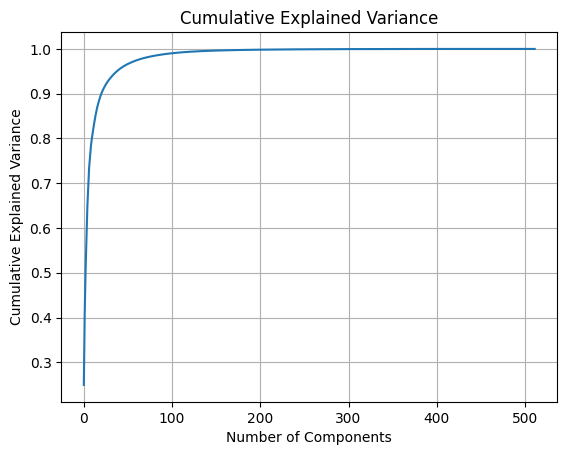

In [ ]:
explained_variance_ratio = eigenvalues/ np.sum(eigenvalues)
plt.plot(np.cumsum(explained_variance_ratio))
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

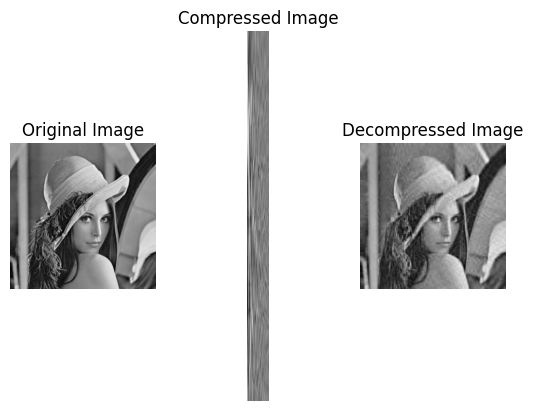

In [ ]:
# reconstruction and experiment

# transform the original data by multiplying it with the selected eigen vectors
k = 30
components = eigenvectors[:,:k]

compressed_data = np.dot(centered_img, components)

# attempting to build then image with the features with most information
decompressed_data = np.dot(compressed_data, components.T) + mean

#Original image
plt.subplot(1,3,1)
plt.imshow(img, cmap ='gray')
plt.title("Original Image")
plt.axis('off')

#Compressed image
plt.subplot(1,3,2)
plt.imshow(compressed_data, cmap='gray')
plt.title("Compressed Image")
plt.axis('off')

#Decompressed image
plt.subplot(1,3,3)
plt.imshow(decompressed_data, cmap='gray')
plt.title("Decompressed Image")
plt.axis('off')

plt.show()

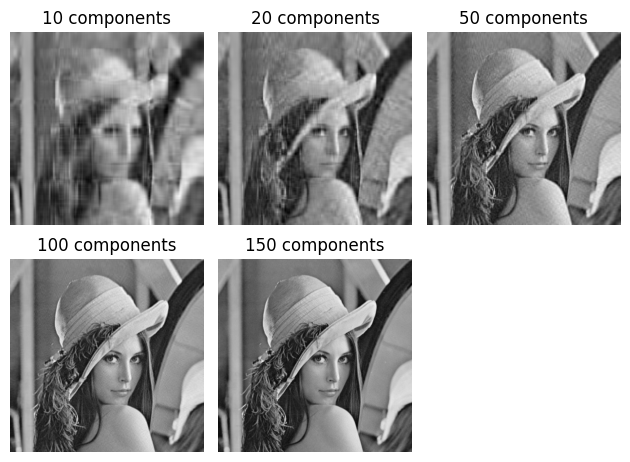

In [ ]:
k1 = 10
k2 = 20
k3 = 50
k4 = 100
k5 = 150

components1 = eigenvectors[:,:k1]
components2 = eigenvectors[:,:k2]
components3 = eigenvectors[:,:k3]
components4 = eigenvectors[:,:k4]
components5 = eigenvectors[:,:k5]

compressed_data1 = np.dot(centered_img, components1)
compressed_data2 = np.dot(centered_img, components2)
compressed_data3 = np.dot(centered_img, components3)
compressed_data4 = np.dot(centered_img, components4)
compressed_data5 = np.dot(centered_img, components5)

decompressed_data1 = np.dot(compressed_data1, components1.T) + mean
decompressed_data2 = np.dot(compressed_data2, components2.T) + mean
decompressed_data3 = np.dot(compressed_data3, components3.T) + mean
decompressed_data4 = np.dot(compressed_data4, components4.T) + mean
decompressed_data5 = np.dot(compressed_data5, components5.T) + mean

#Decompressed images

plt.subplot(2,3,1)
plt.imshow(decompressed_data1, cmap='gray')
plt.title("10 components")
plt.axis('off')

plt.subplot(2,3,2)
plt.imshow(decompressed_data2, cmap='gray')
plt.title("20 components")
plt.axis('off')

plt.subplot(2,3,3)
plt.imshow(decompressed_data3, cmap='gray')
plt.title("50 components")
plt.axis('off')

plt.subplot(2,3,4)
plt.imshow(decompressed_data4, cmap='gray')
plt.title("100 components")
plt.axis('off')

plt.subplot(2,3,5)
plt.imshow(decompressed_data5, cmap='gray')
plt.title("150 components")
plt.axis('off')

plt.tight_layout()
plt.show()